# MineCraft Project - Kristen Chan

# Introduction

### Background
This project focuses on the video game Minecraft by examining different characteristics and behaviours that can affect whether or not a player will subscribe to a game-related newsletter. 

### Dataset Description
* Number of Observations: 196
* Number of Variables: 7
* Data Source: The Pacific Laboratory for Artificial Intelligence (PLAI) led by Frank Wood
* Summary of the Dataset: This data is used to determine user engagement across Minecraft by collecting personal information of each individual player to perform further analysis.  

| Column Name |Data Type | Description|Possible Value/Range| 
|-----------|-------|-------------|-------------|
|  experience| character (chr)  |Player’s level of experience with the game |Beginner, Veteran, Regular,Amateur,Pro |
| subscribe |Logical value (lgl) | Player’s subscription status to the game |TRUE, FALSE  |
|hashedEmail  |character (chr) |Player’s email(hashed for privacy)|N/A |
|played_hours |numeric (dbl) |Total amount of hours players's spent playing in the game |N/A |
|name |character (chr) |Player’s name |N/A|
|gender|character (chr)  | Player’s gender|Agender,Male, Female, Non-binary, Two-spirited, Prefer not to Say, Other |
|Age| numeric (dbl) | Player’s Age | N/A|

*Some columns will not be used in the analysis including hashedEmail, name, played_hours*


## Questions
### Broad Question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question: 
Can gender and experience predict newsletter subscription to the game? 


## Data Analysis

In [48]:
library(tidyverse)
library(tidymodels)
library(lubridate)


In [37]:
players <- read_csv("players.csv")

players <- players |>
    select(experience, subscribe, gender)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,gender
<chr>,<lgl>,<chr>
Pro,TRUE,Male
Veteran,TRUE,Male
Veteran,FALSE,Male
Amateur,TRUE,Female
Regular,TRUE,Male
Amateur,TRUE,Female
Regular,TRUE,Female
Amateur,FALSE,Male
Amateur,TRUE,Male


## Preliminary Data Visualizations

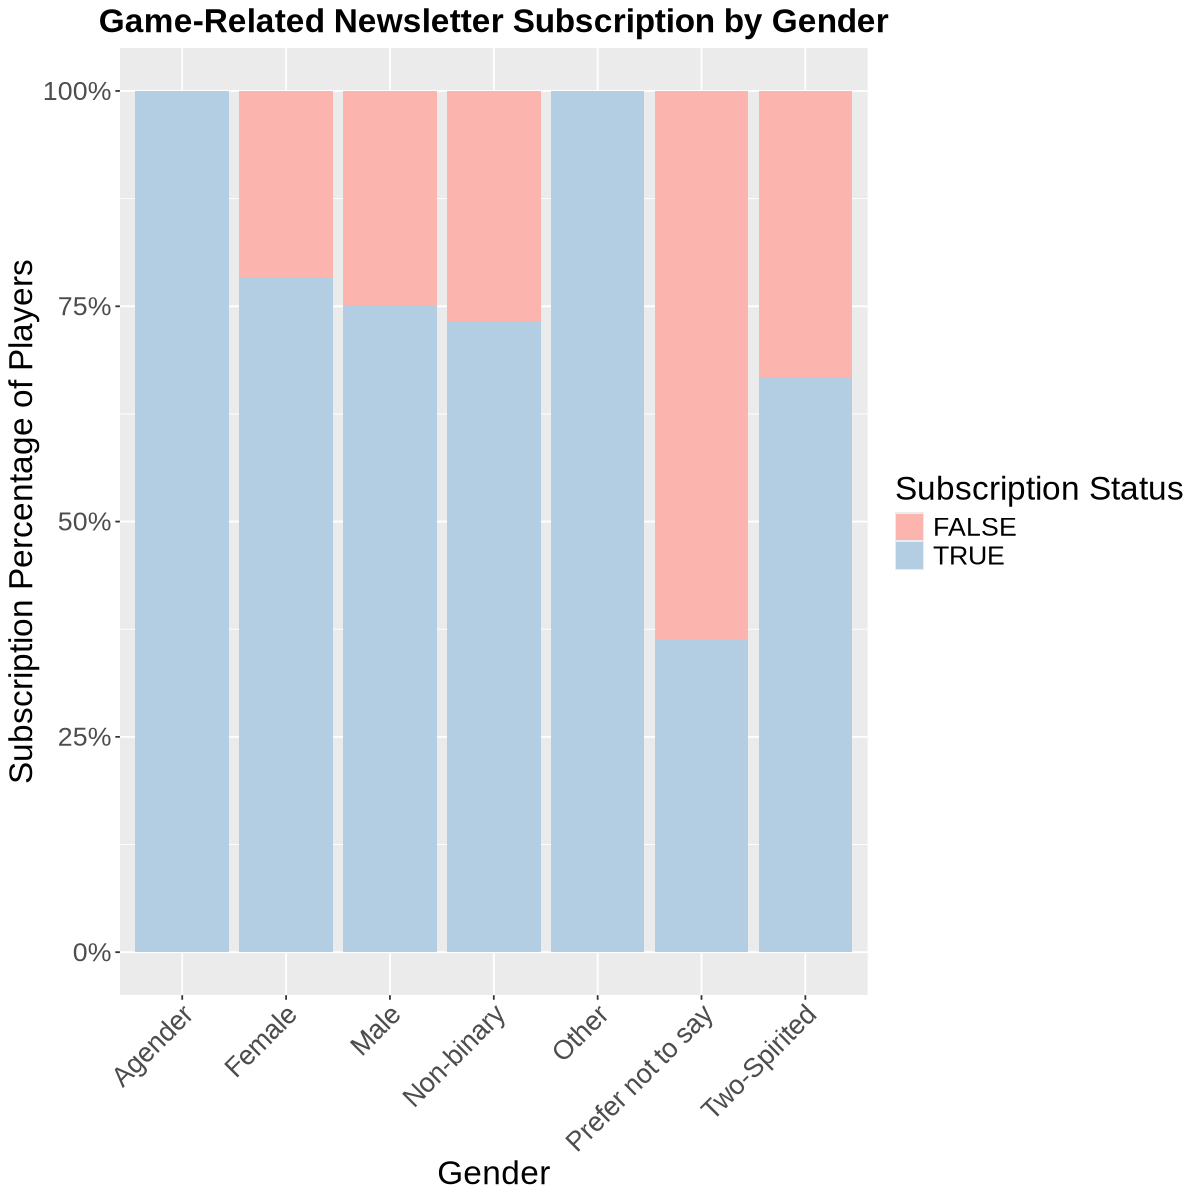

In [54]:
options(repr.plot.width=10, repr.plot.height=10)

subscription_gender_plot <- players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Gender") +
    ylab("Subscription Percentage of Players") +
    labs(fill = "Subscription Status") +
    ggtitle("Game-Related Newsletter Subscription by Gender") +
    scale_fill_brewer(palette = 'Pastel1') + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(angle = 45,hjust = 1),
        plot.title = element_text(size = 20,face = 'bold',hjust = 0.5))


    
subscription_gender_plot

#### Data Insights:
Females and males have similar percentage levels of subscription status. However, in the category "prefer not to say" has the lowest percentage of subscription status.

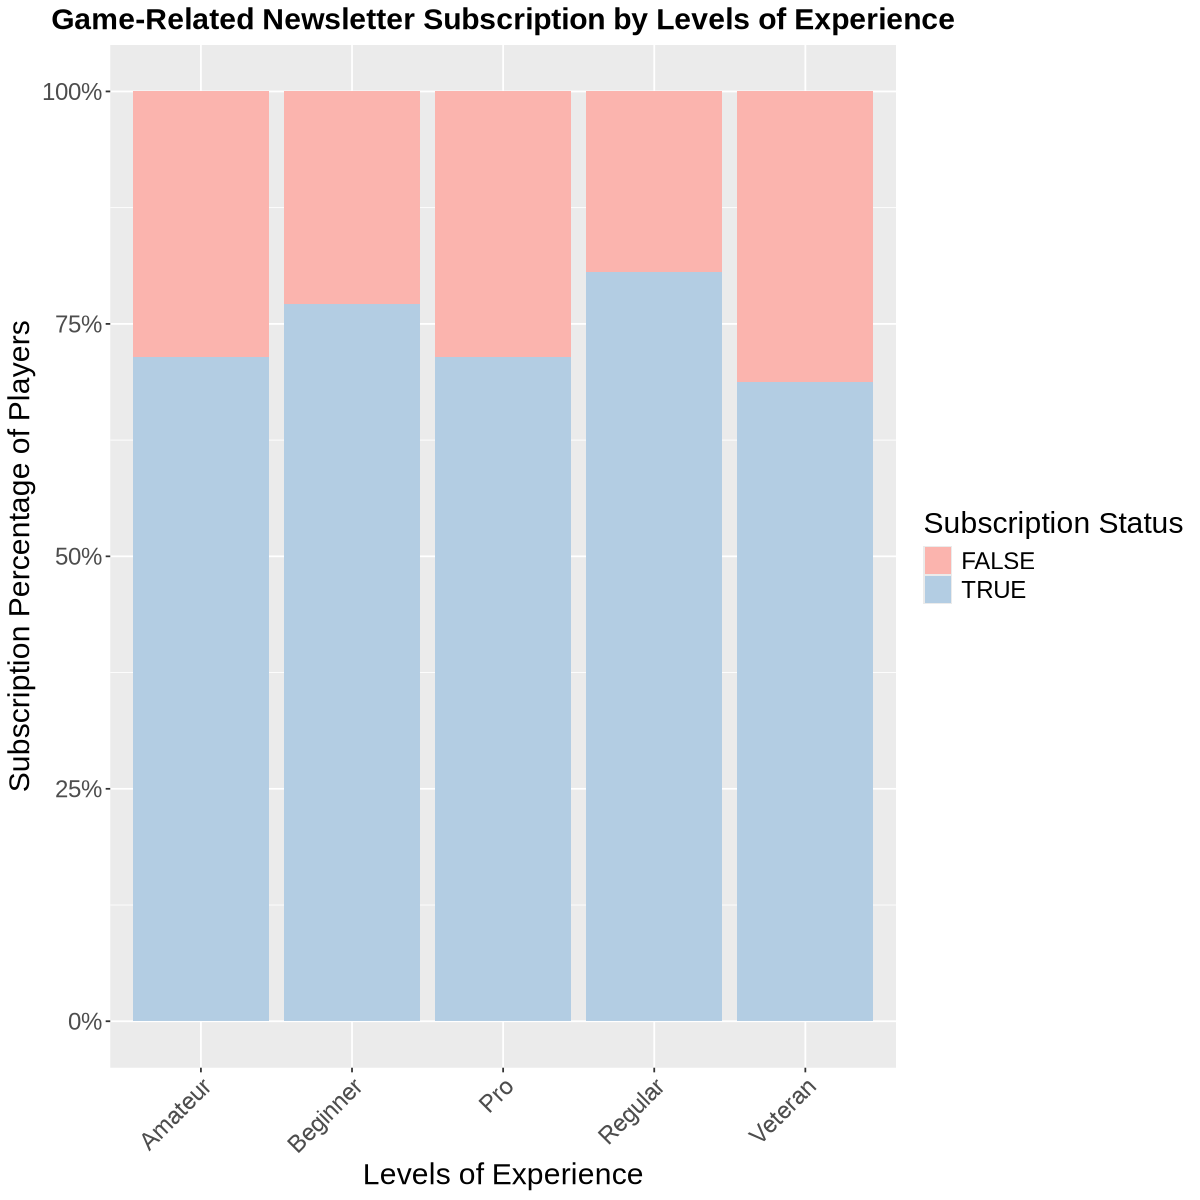

In [55]:
subscription_experience_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent) +
    xlab("Levels of Experience") +
    ylab("Subscription Percentage of Players") +
    labs(fill = "Subscription Status") +
    ggtitle("Game-Related Newsletter Subscription by Levels of Experience") +
    scale_fill_brewer(palette = 'Pastel1') + 
    theme(text = element_text(size = 18),
        axis.text.x = element_text(angle = 45,hjust = 1),
        plot.title = element_text(size = 18,face ='bold',hjust = 0.5))
subscription_experience_plot

#### Data Insights:
Levels of experience doesn't seem to affect the subscription status of players as the percentage range is very similar for each category. 

## Methods

To answer the above research questions, to predict if gender and level of player experience can determine whether or not a player subscribes to a game related newsletter, K-nearest neighbor classification will be used. 